In [81]:
! pip install --upgrade openpyxl
! pip install --upgrade xlrd


  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.2
    Uninstalling openpyxl-3.1.2:
      Successfully uninstalled openpyxl-3.1.2


In [46]:
import pandas as pd
import ast

def process_city_file(file_path, city_name):
    # Load the Excel file into a pandas DataFrame
    df_city = pd.read_excel(file_path, engine='openpyxl')

    # Function to flatten nested dictionaries and lists
    def flatten_dict(d, parent_key='', sep='_'):
        items = []
        for k, v in d.items():
            new_key = f'{parent_key}{sep}{k}' if parent_key else k
            if isinstance(v, dict):
                items.extend(flatten_dict(v, new_key, sep=sep).items())
            elif isinstance(v, list):
                for i, item in enumerate(v):
                    if isinstance(item, dict):
                        items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                    else:
                        items.append((f'{new_key}_{i}', item))
            else:
                items.append((new_key, v))
        return dict(items)

    # Initialize a dictionary to hold all structured DataFrames
    structured_data = {
        'new_car_detail': pd.DataFrame(),
        'new_car_overview': pd.DataFrame(),
        'new_car_feature': pd.DataFrame(),
        'new_car_specs': pd.DataFrame()
    }

    # Process columns with nested data structures
    columns_to_process = ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']

    for col in columns_to_process:
        flattened_data = []
        for unstructured_data in df_city[col]:
            flattened_row = flatten_dict(ast.literal_eval(unstructured_data))
            flattened_data.append(flattened_row)
        structured_data[col] = pd.DataFrame(flattened_data)

    # Concatenate all structured DataFrames into one
    city_cars_structured = pd.concat(structured_data.values(), axis=1)

    # Include 'car_links' in the final DataFrame
    city_cars_structured['car_links'] = df_city['car_links']

    # Add the 'City' column
    city_cars_structured['City'] = city_name

    return city_cars_structured

# Define city file paths
cities = {
    "Kolkata": r"C:\Users\NAGARAJAN K\Downloads\kolkata_cars.xlsx",
    "Delhi": r"C:\Users\NAGARAJAN K\Downloads\delhi_cars.xlsx",
    "Bangalore": r"C:\Users\NAGARAJAN K\Downloads\bangalore_cars.xlsx",
    "Chennai": r"C:\Users\NAGARAJAN K\Downloads\chennai_cars.xlsx",
    "Hyderabad": r"C:\Users\NAGARAJAN K\Downloads\hyderabad_cars.xlsx",
    "Jaipur": r"C:\Users\NAGARAJAN K\Downloads\jaipur_cars.xlsx"
}

output_directory = r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3"

# Process each city and save the result to an Excel file
for city, file_path in cities.items():
    city_data = process_city_file(file_path, city)
    # Save the DataFrame to an Excel file
    output_file = f"{output_directory}/{city}_cars.xlsx"
    city_data.to_excel(output_file, index=False)


# # Process each city file and save them separately
# for city, file_path in cities.items():
#     city_data = process_city_file(file_path, city)
#     # Save each city's processed data to a separate CSV file
#     output_csv_path = f"C:\\Users\\NAGARAJAN K\\Desktop\\car_dheko_{city.lower()}.csv"
#     city_data.to_csv(output_csv_path, index=False)

#     # Display confirmation message
#     print(f"Saved data for {city} to {output_csv_path}")


# concating data

In [82]:
import os
import pandas as pd

# List of city dataset file paths
file_paths = [
    r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\kolkata_cars.xlsx",
    r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\delhi_cars.xlsx",
    r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\bangalore_cars.xlsx",
    r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\chennai_cars.xlsx",
    r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\hyderabad_cars.xlsx",
    r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\jaipur_cars.xlsx"
]

# Function to read and combine datasets from multiple files
def conca_city_data(files):
    df_list = []
    for file in files:
        try:
            df = pd.read_excel(file)
            df_list.append(df)
            print(f"Successfully read: {file}")
        except Exception as e:
            print(f"Error reading {file}: {e}")
    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Merging datasets
merged_data = conca_city_data(file_paths)

# Specify output directory and file name
output_directory = r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3"
output_filename = 'car_dekho_Structured.csv'
output_filepath = os.path.join(output_directory, output_filename)

# Check if the output directory exists, create it if not
os.makedirs(output_directory, exist_ok=True)

# Save the merged dataset to CSV
try:
    merged_data.to_csv(output_filepath, index=False)
    print(f"Data successfully merged and saved at: {output_filepath}")
except Exception as e:
    print(f"Error saving data to CSV: {e}")


Successfully read: C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\kolkata_cars.xlsx
Successfully read: C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\delhi_cars.xlsx
Successfully read: C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\bangalore_cars.xlsx
Successfully read: C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\chennai_cars.xlsx
Successfully read: C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\hyderabad_cars.xlsx
Successfully read: C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\jaipur_cars.xlsx
Error saving data to CSV: cannot import name 'SequenceNotStr' from 'pandas._typing' (c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\_typing.py)


In [56]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Helper function to load the dataset
def load_data(file_path):
    return pd.read_csv(file_path, low_memory=False)

# Function to drop columns with more than 50% missing values
def drop_columns_with_missing_values(df, threshold=0.5):
    limit = len(df) * threshold
    return df.dropna(thresh=limit, axis=1)

# Function to clean and convert the 'price' column
def clean_price_column(df, column='price'):
    def convert_price(price):
        try:
            price_str = str(price).replace('₹', '').replace(',', '').strip()
            if 'Lakh' in price_str:
                return float(price_str.replace('Lakh', '').strip()) * 100000
            return float(price_str)
        except ValueError:
            return np.nan
    df[column] = df[column].apply(convert_price)
    return df

# Function to clean 'km' column
def clean_km_column(df, column='km'):
    df[column] = df[column].str.replace('Kms', '').str.replace(',', '').astype(float)
    return df

# Function to fill missing values with median for specific columns
def fill_missing_values(df, columns):
    for col in columns:
        df[col].fillna(df[col].median(), inplace=True)
    return df

# Function to clean and extract mileage from 'top_0_value.2' column
def clean_mileage_column(df, column='top_0_value.2'):
    def clean_mileage(mileage):
        try:
            mileage_str = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
            mileage_float = float(mileage_str)
            return mileage_float if mileage_float < 100 else np.nan  # Assuming mileage < 100
        except ValueError:
            return np.nan
    df['mileage'] = df[column].apply(clean_mileage)
    return df

# Function to clean and extract seats from 'top_3_value' column
def clean_seats_column(df, column='top_3_value'):
    def clean_seats(seats):
        try:
            seats_int = int(str(seats).replace('Seats', '').strip())
            return seats_int if seats_int < 10 else np.nan  # Assuming seats < 10
        except ValueError:
            return np.nan
    df['Seats'] = df[column].apply(clean_seats)
    return df

# Function for label encoding of categorical variables
def label_encode_columns(df, columns):
    label_encoders = {}
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders

# Function for min-max scaling of numerical columns
def min_max_scale_columns(df, columns):
    scalers = {}
    for col in columns:
        scaler = MinMaxScaler()
        df[col] = scaler.fit_transform(df[[col]])
        scalers[col] = scaler
    return df, scalers

# Function to remove outliers using IQR method for a specific column
def remove_outliers(df, column='price'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

# Main function to run the data cleaning pipeline
def data_cleaning_pipeline(input_file, output_file, label_encoder_file, scaler_file):
    # Load dataset
    df = load_data(input_file)
    
    # Step 1: Drop columns with more than 50% missing values
    df = drop_columns_with_missing_values(df)
    
    # Step 2: Clean the 'price' column
    df = clean_price_column(df)
    
    # Step 3: Clean 'km' column
    df = clean_km_column(df)
    
    # Step 4: Fill missing values for specific numerical columns
    df = fill_missing_values(df, ['price', 'ownerNo', 'km'])
    
    # Step 5: Drop redundant columns
    df.drop(columns=['owner'], inplace=True)
    
    # Step 6: Clean 'top_0_value.2' and 'top_3_value' columns
    df = clean_mileage_column(df)
    df = clean_seats_column(df)
    df.drop(columns=['top_0_value.2', 'top_3_value'], inplace=True)
    
    # Step 7: Label encode categorical variables
    categorical_columns = ['ft', 'bt', 'transmission', 'oem', 'model', 'variantName', 'City']
    df, label_encoders = label_encode_columns(df, categorical_columns)
    
    # Step 8: Min-Max scale numerical columns
    numerical_columns = ['km', 'modelYear', 'ownerNo', 'mileage', 'Seats']
    df, scalers = min_max_scale_columns(df, numerical_columns)
    
    # Step 9: Remove outliers from 'price' column
    df = remove_outliers(df)
#     selected_columns = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats', 'price']

# # Create a new DataFrame with only the selected columns
#     df_selected = df[selected_columns]

# # Save the new DataFrame to a new Excel file
#     df_selected.to_excel(output_file, index=False)
    
    
    # Save the label encoders and scalers
    joblib.dump(label_encoders, label_encoder_file)
    joblib.dump(scalers, scaler_file)
    
    print(f"Data cleaning complete. Cleaned dataset saved as '{output_file}'.")
    print(f"Preprocessing steps (label encoders and scalers) saved.")

# File paths
input_path = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_Structured.csv'
output_path = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.xlsx'
label_encoders_path =r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\label_encoders.pkl'
scalers_path = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\scalers.pkl'

# Run the data cleaning pipeline
data_cleaning_pipeline(input_path, output_path, label_encoders_path, scalers_path)


Data cleaning complete. Cleaned dataset saved as 'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.xlsx'.
Preprocessing steps (label encoders and scalers) saved.


# Visualization

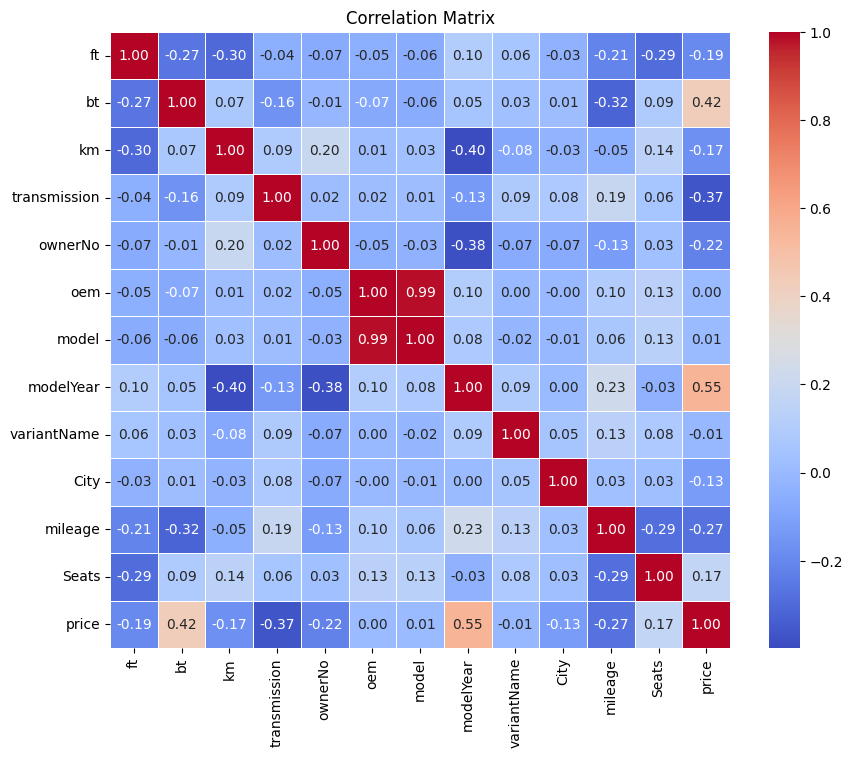

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.xlsx')

# Correlation matrix for numeric columns
corr_matrix = df.corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


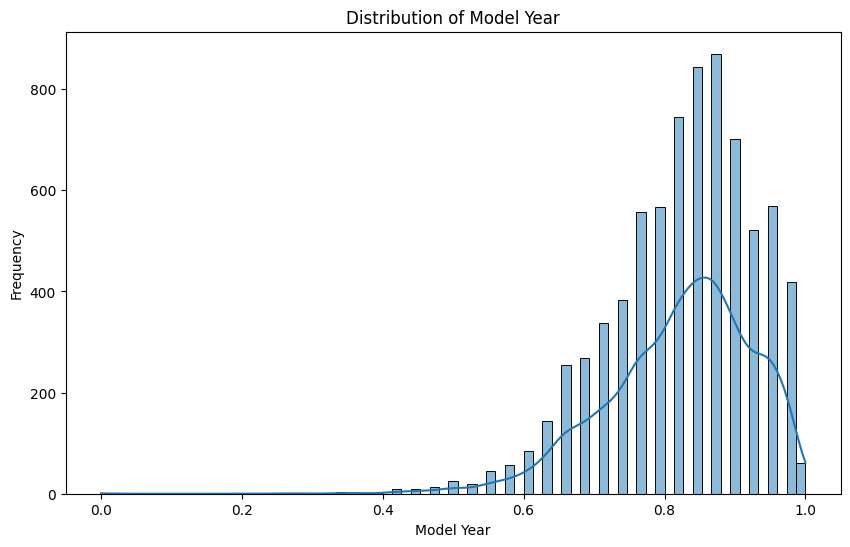

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['modelYear'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

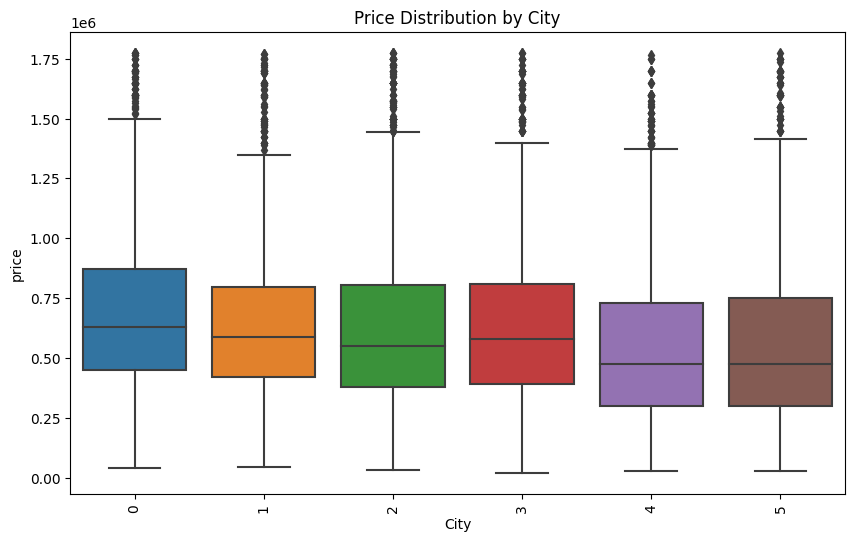

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='price', data=df)
plt.title('Price Distribution by City')
plt.xticks(rotation=90)
plt.show()


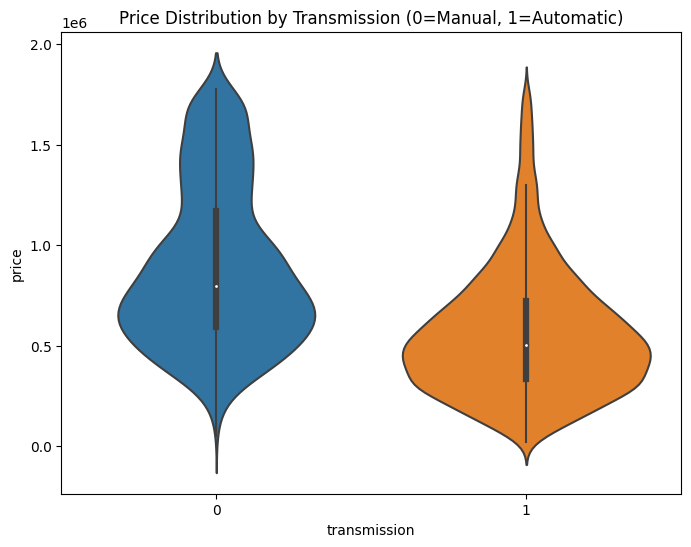

In [60]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='transmission', y='price', data=df)
plt.title('Price Distribution by Transmission (0=Manual, 1=Automatic)')
plt.show()


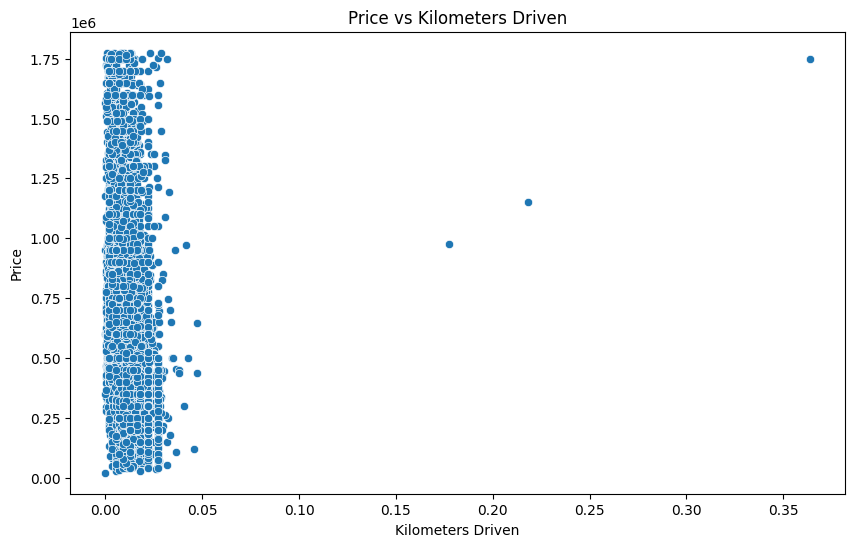

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km', y='price', data=df)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

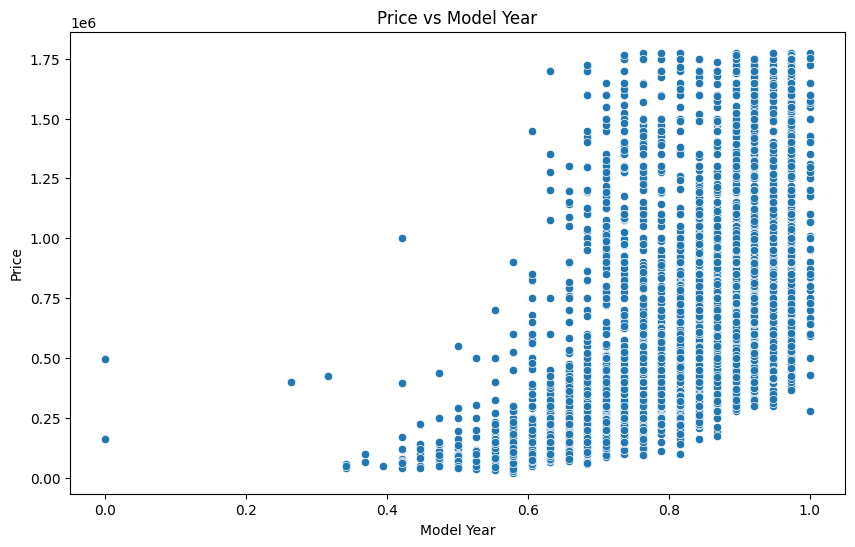

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='modelYear', y='price', data=df)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

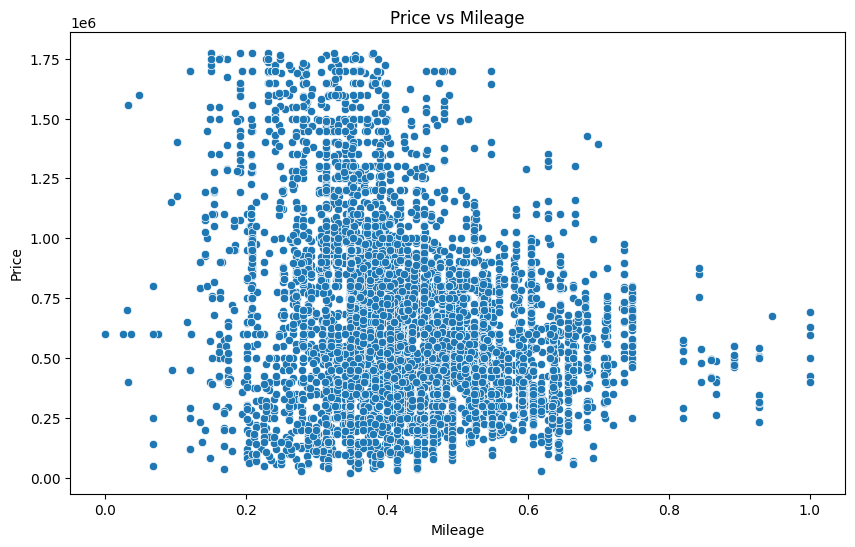

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# machine learning 

In [68]:
import pandas as pd
cleaned_data=pd.read_csv(r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.csv")
cleaned_data.head()

C:\Users\NAGARAJAN K\AppData\Local\Temp\ipykernel_35388\3834878468.py:2: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data=pd.read_csv(r"C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.csv")


,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_9_key,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,car_links,City,mileage,Seats
0,0,4,8,0.012727,0,0.6,30,279,0.763158,2123,...,No Door Numbers,4,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,5,0.423562,0.428571
1,0,4,2,0.004360,1,0.2,4,39,0.842105,5236,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,5,0.547686,0.428571
2,0,4,7,0.001291,0,0.2,27,239,0.947368,8352,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,5,0.419004,0.428571
3,0,4,2,0.013013,1,0.4,9,90,0.684211,1642,...,Alloy Wheel Size,14,No Door Numbers,5,Cargo Volumn,295 Lit,https://www.cardekho.com/buy-used-car-details/...,5,0.347826,0.428571
4,0,1,7,0.009091,0,0.4,0,7,0.763158,99,...,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,16,No Door Numbers,5,https://www.cardekho.com/used-car-details/used...,5,0.303296,0.428571


In [69]:
cleaned_data.isnull().sum()

it                           0
ft                           0
bt                           0
km                           0
transmission                 0
                          ... 
data_2_list_11_value.1    3503
car_links                    0
City                         0
mileage                    173
Seats                       61
Length: 214, dtype: int64

Hypothesis test(T-Test)

In [70]:
from scipy import stats

# Split data into two groups based on transmission type
auto = df[df['transmission'] == 1]['price']
manual = df[df['transmission'] == 0]['price']

# Perform t-test
t_stat, p_value = stats.ttest_ind(auto, manual)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis (significant difference).")
else:
    print("We fail to reject the null hypothesis (no significant difference).")


T-statistic: -34.44694751100672
P-value: 1.481043811269028e-241
We reject the null hypothesis (significant difference).


chi sqaure test

In [71]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['City'], df['transmission'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis (variables are dependent).")
else:
    print("We fail to reject the null hypothesis (variables are independent).")


Chi-square statistic: 71.0930909457366
P-value: 6.068559317697264e-14
We reject the null hypothesis (variables are dependent).


T-Test for Mileage by Transmission Type

In [72]:
# Split data into two groups based on transmission type for mileage
auto_mileage = df[df['transmission'] == 1]['mileage']
manual_mileage = df[df['transmission'] == 0]['mileage']

# Perform t-test
t_stat_mileage, p_value_mileage = stats.ttest_ind(auto_mileage, manual_mileage)

print(f"T-statistic (mileage): {t_stat_mileage}")
print(f"P-value (mileage): {p_value_mileage}")

if p_value_mileage < 0.05:
    print("We reject the null hypothesis (significant difference in mileage).")
else:
    print("We fail to reject the null hypothesis (no significant difference in mileage).")


T-statistic (mileage): nan
P-value (mileage): nan
We fail to reject the null hypothesis (no significant difference in mileage).


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats']
X = cleaned_data[features]
y = cleaned_data['price']

# One-hot encode categorical variables, dropping the first category to avoid multicollinearity
X_encoded = pd.get_dummies(X, drop_first=True)

# Perform the train-test split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the sizes of the train and test sets
print(f"Training set size (X_train): {len(X_train)}")
print(f"Test set size (X_test): {len(X_test)}")
print(f"Training labels size (y_train): {len(y_train)}")
print(f"Test labels size (y_test): {len(y_test)}")

Training set size (X_train): 6008
Test set size (X_test): 1503
Training labels size (y_train): 6008
Test labels size (y_test): 1503


Linear Regression - MSE: 47119290815.2753, MAE: 157968.0806, R²: 0.6375


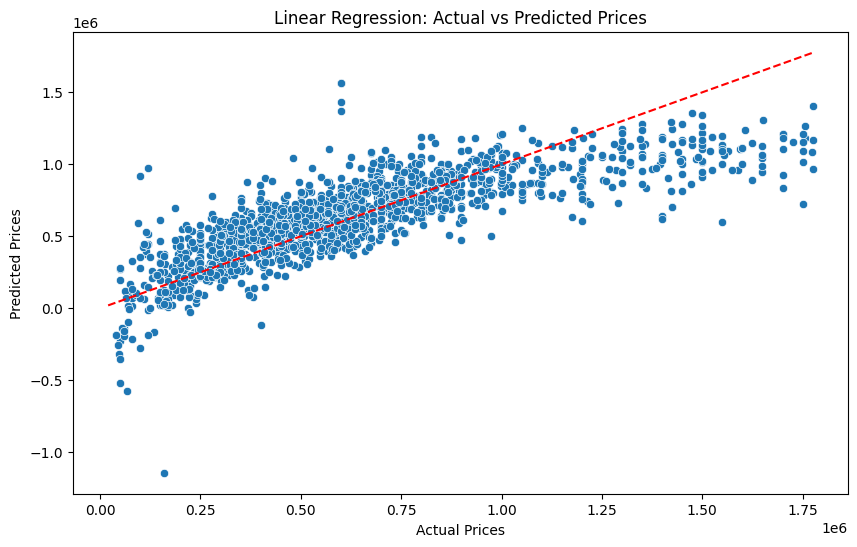

Best Ridge Alpha: 1
Best Lasso Alpha: 100


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.xlsx'
df = pd.read_excel(dataset_path)

# Define features and target variable
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats']
X = df[features]
y = df['price']

# Handle missing values in features using mean imputation
X = SimpleImputer(strategy='mean').fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize, train, and evaluate Linear Regression model
lr_model = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance on test data
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Ridge and Lasso Regression with simple Grid Search
def tune_model(model, param_name):
    param_grid = {param_name: [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_[param_name]

best_ridge_alpha = tune_model(Ridge(), 'alpha')
best_lasso_alpha = tune_model(Lasso(), 'alpha')

print(f'Best Ridge Alpha: {best_ridge_alpha}')
print(f'Best Lasso Alpha: {best_lasso_alpha}')


C:\Users\NAGARAJAN K\AppData\Local\Temp\ipykernel_35388\3170316067.py:12: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


Random Forest - MSE: 16410019889.3404, MAE: 78481.8792, R²: 0.8738


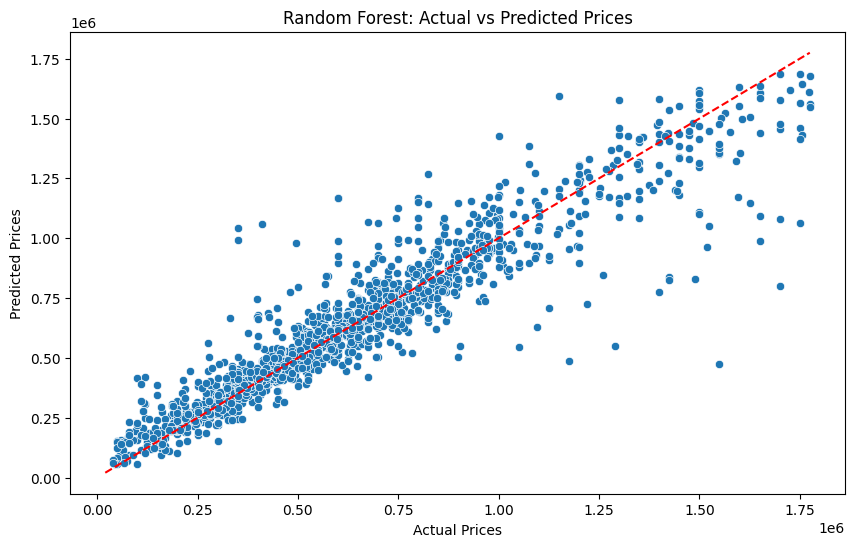

Gradient Boosting - MSE: 13687317277.1117, MAE: 70575.1964, R²: 0.8947


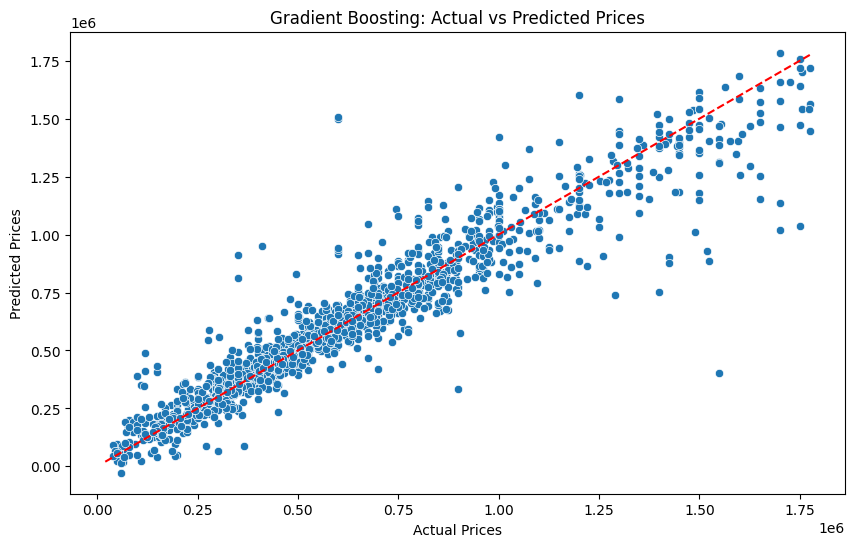

Decision Tree - MSE: 26507763194.5542, MAE: 100099.0401, R²: 0.7961


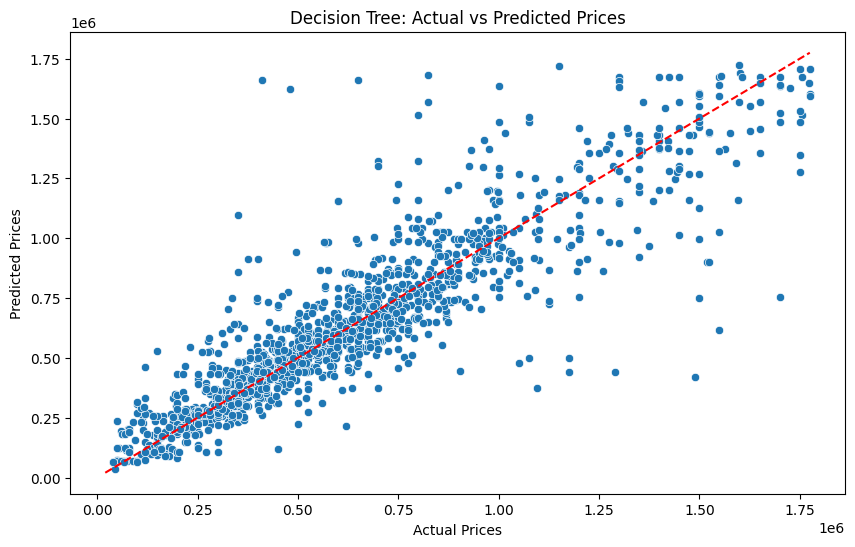

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.csv'
df = pd.read_csv(dataset_path)

# Define features and target variable
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats']
X = df[features]
y = df['price']

# Handle missing values in features using mean imputation
X = SimpleImputer(strategy='mean').fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}')
    
    # Plot Actual vs Predicted Prices
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name}: Actual vs Predicted Prices')
    plt.show()

# Hyperparameter tuning with GridSearchCV
def tune_model(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Random Forest Regressor with Grid Search
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
best_rf_model = tune_model(RandomForestRegressor(random_state=42), rf_param_grid)
train_and_evaluate(best_rf_model, 'Random Forest')

# Gradient Boosting Regressor with Grid Search
gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
best_gb_model = tune_model(GradientBoostingRegressor(random_state=42), gb_param_grid)
train_and_evaluate(best_gb_model, 'Gradient Boosting')

# Decision Tree Regressor with Grid Search
dt_param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
best_dt_model = tune_model(DecisionTreeRegressor(random_state=42), dt_param_grid)
train_and_evaluate(best_dt_model, 'Decision Tree')


In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to train, predict and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# After running the models and storing the evaluation metrics:
# Assume you have trained the following models with GridSearchCV:
# best_rf_model, best_gb_model, best_dt_model
# and you have the linear regression model `lr_model` already trained.

# Evaluate models and store results
mse_lr, mae_lr, r2_lr = train_and_evaluate(lr_model, X_train, X_test, y_train, y_test)
mse_rf, mae_rf, r2_rf = train_and_evaluate(best_rf_model, X_train, X_test, y_train, y_test)
mse_gbr, mae_gbr, r2_gbr = train_and_evaluate(best_gb_model, X_train, X_test, y_train, y_test)
mse_dt, mae_dt, r2_dt = train_and_evaluate(best_dt_model, X_train, X_test, y_train, y_test)

# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'MSE': [mse_lr, mse_rf, mse_gbr, mse_dt],
    'MAE': [mae_lr, mae_rf, mae_gbr, mae_dt],
    'R²': [r2_lr, r2_rf, r2_gbr, r2_dt]
}

# Create a DataFrame to compare model performance
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df.to_string(index=False))

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.iloc[best_model_idx]

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model['Model']}")
print(f"MSE: {best_model['MSE']:.4f}")
print(f"MAE: {best_model['MAE']:.4f}")
print(f"R²: {best_model['R²']:.4f}")



Model Comparison Table:
            Model          MSE           MAE       R²
Linear Regression 4.711929e+10 157968.080552 0.637533
    Random Forest 1.641002e+10  78481.879239 0.873765
Gradient Boosting 1.368732e+10  70575.196398 0.894710
    Decision Tree 2.650776e+10 100099.040085 0.796088

Best Model Summary:
Best Model: Gradient Boosting
MSE: 13687317277.1117
MAE: 70575.1964
R²: 0.8947


C:\Users\NAGARAJAN K\AppData\Local\Temp\ipykernel_35388\2234766347.py:13: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Preprocessing files loaded successfully.
Gradient Boosting CV Mean MSE: 10952132969.1279
Gradient Boosting - MSE: 11769478665.2316, MAE: 67310.2224, R²: 0.9095
Training Time: 149.01 seconds
Prediction Time: 0.01 seconds
Older Cars - MSE: 5065956347.7432, MAE: 47618.0240, R²: 0.9607


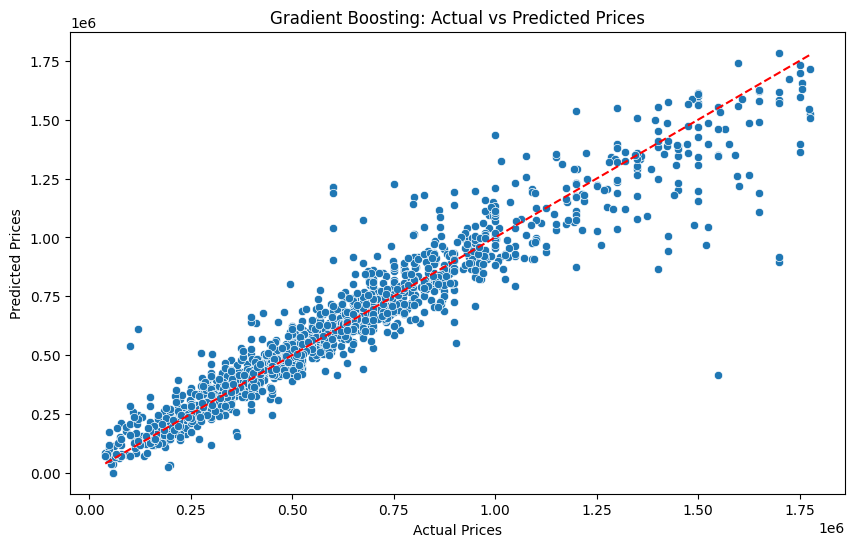

Model training complete. Model saved as 'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_price_prediction_gb_model.pkl'.


In [77]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time

# Load and preprocess dataset
data_path = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_dekho_cleaned_dataset.csv'
data = pd.read_csv(data_path)

# Fill missing values
# Filling numerical columns with the mean
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Filling categorical columns with the mode
cat_cols = data.select_dtypes(include=[object]).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Attempt to load preprocessing steps (Label encoders and scalers)
label_encoders_path =r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\label_encoders.pkl'
scalers_path = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\scalers.pkl'
try:
    label_encoders = joblib.load(label_encoders_path)
    scalers = joblib.load(scalers_path)
    print("Preprocessing files loaded successfully.")
except FileNotFoundError as e:
    print(f"Warning: {e}")
    print("Proceeding without preprocessing steps.")

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']  # Calculate car age
brand_popularity = data.groupby('oem')['price'].mean().to_dict()  # Mean price by brand
data['brand_popularity'] = data['oem'].map(brand_popularity)  # Map mean prices to the dataset
data['mileage_normalized'] = data['mileage'] / data['car_age']  # Normalize mileage by car age

# Define features and target
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 
            'mileage', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for Random Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search for hyperparameter tuning
start_time = time.time()
gb_random = RandomizedSearchCV(
    gb_model, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    random_state=42
)
gb_random.fit(X_train, y_train)
end_time = time.time()

# Retrieve the best model
best_gb_model = gb_random.best_estimator_

# Cross-validation to evaluate the model's performance
gb_cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gb_cv_scores.mean():.4f}')

# Make predictions on the test set
start_predict_time = time.time()
y_pred_gb = best_gb_model.predict(X_test)
end_predict_time = time.time()

# Model evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - MSE: {mse_gb:.4f}, MAE: {mae_gb:.4f}, R²: {r2_gb:.4f}')
print(f'Training Time: {end_time - start_time:.2f} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time:.2f} seconds')

# Evaluate model performance on older cars
older_cars = data[data['car_age'] > 10]
X_older = older_cars[features]
y_older = older_cars['price']

y_pred_older_gb = best_gb_model.predict(X_older)
mse_older_gb = mean_squared_error(y_older, y_pred_older_gb)
mae_older_gb = mean_absolute_error(y_older, y_pred_older_gb)
r2_older_gb = r2_score(y_older, y_pred_older_gb)

print(f'Older Cars - MSE: {mse_older_gb:.4f}, MAE: {mae_older_gb:.4f}, R²: {r2_older_gb:.4f}')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Save the trained model
model_save_path_gb = r'C:\Users\NAGARAJAN K\Desktop\car dhekomethod3\car_price_prediction_gb_model.pkl'
joblib.dump(best_gb_model, model_save_path_gb)

print(f"Model training complete. Model saved as '{model_save_path_gb}'.")
